In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import boxcox
import pandas as pd

In [3]:
file_path = 'bor_2324_data.csv'
bor_2324_df = pd.read_csv(file_path)
# Drop rows with missing values in any hospital capacity columns to focus on complete data entries

# Define hospitals to analyze
hospitals = ['AH', 'CGH', 'KTPH', 'NTFGH', 'NUH(A)', 'SGH', 'SKH', 'TTSH', 'WH']

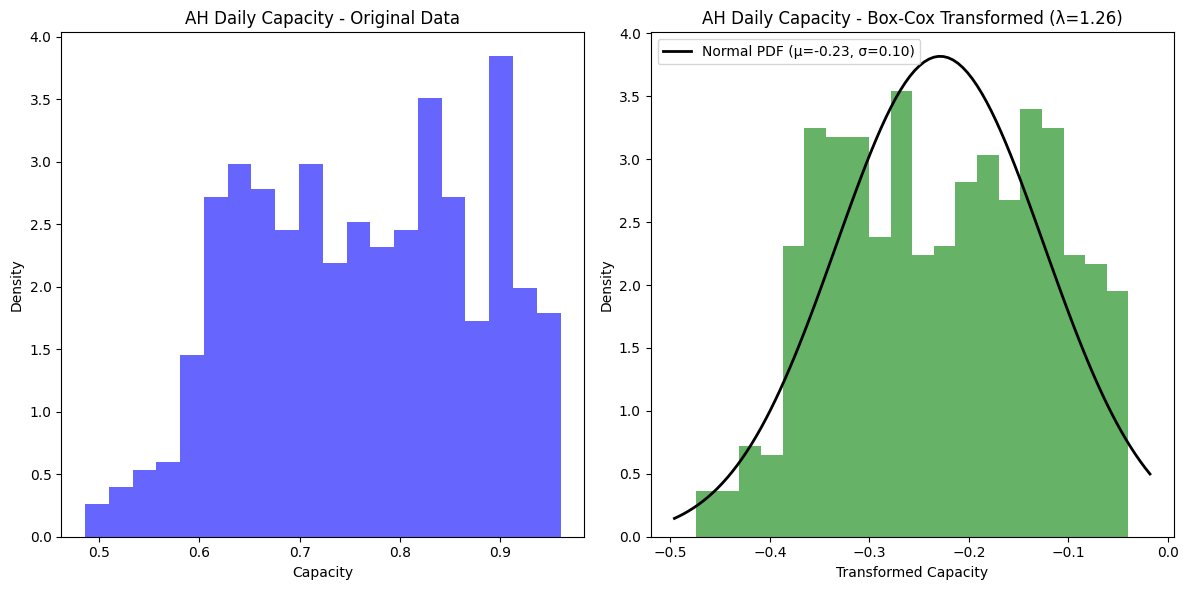

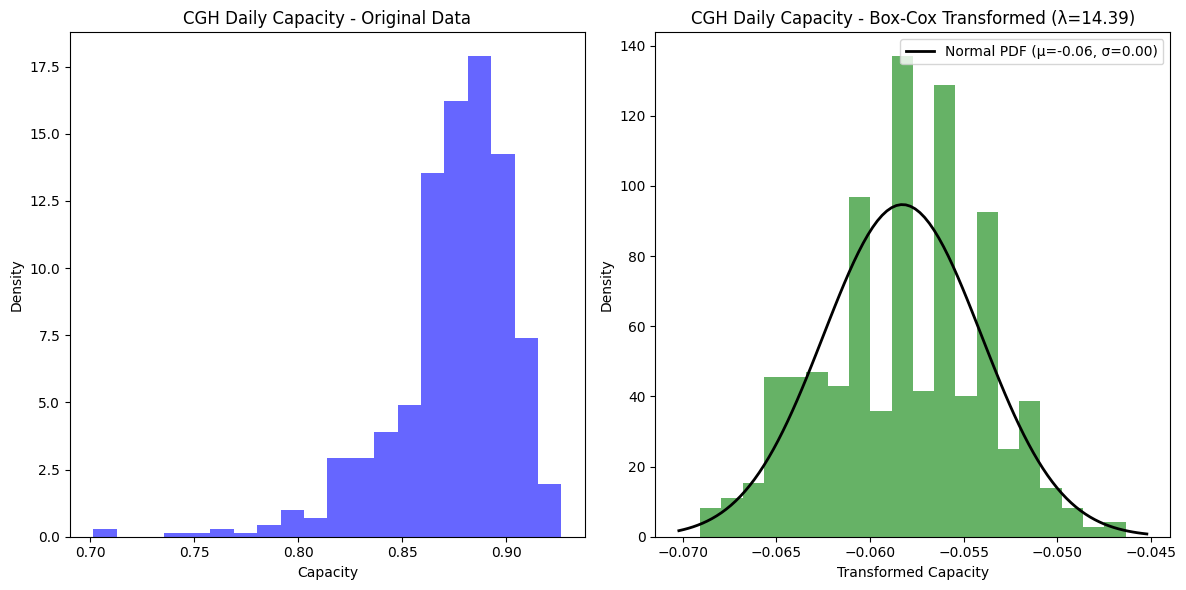

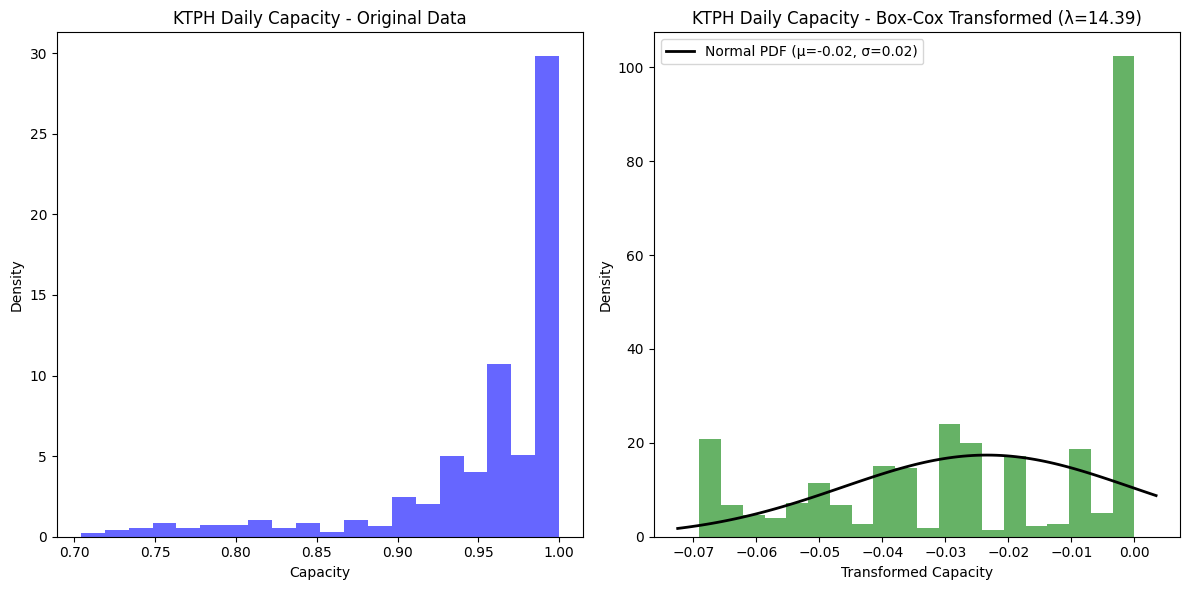

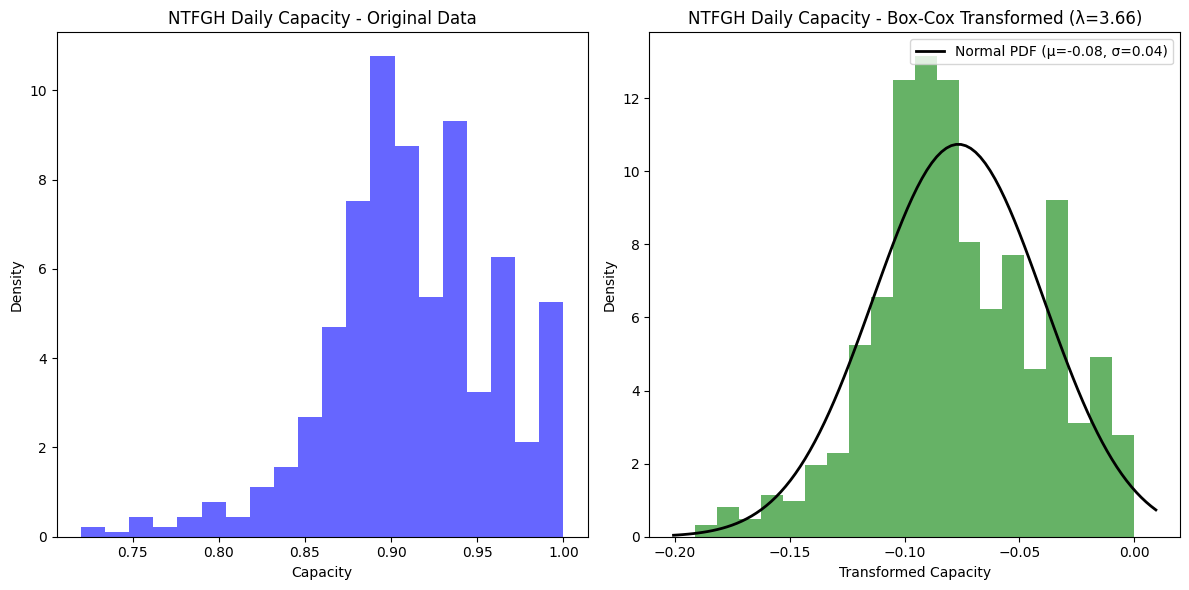

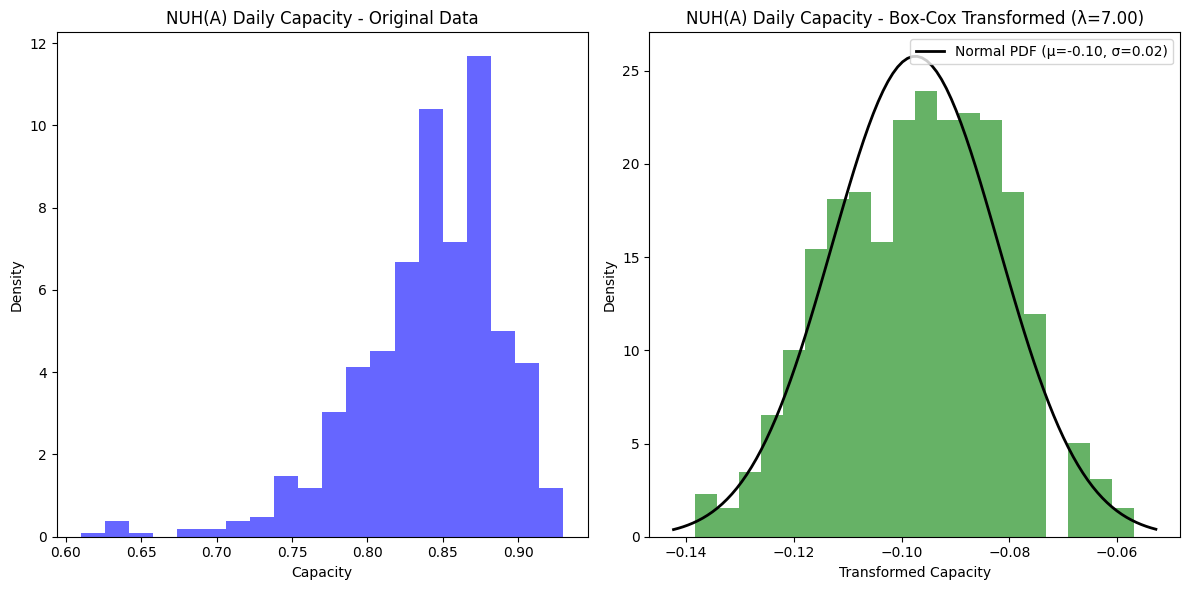

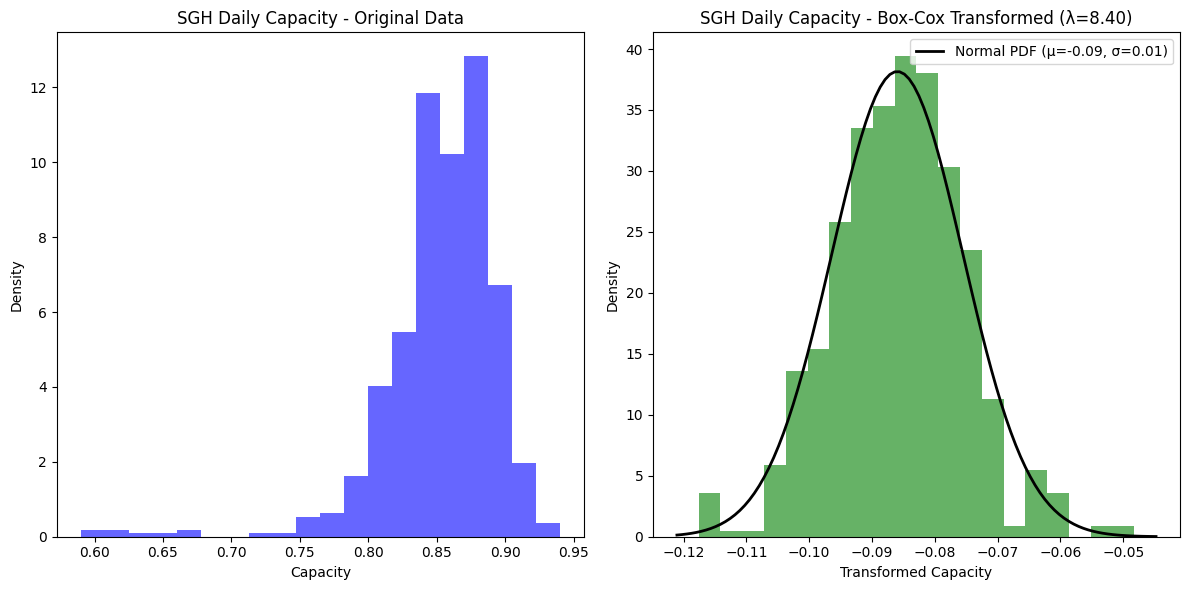

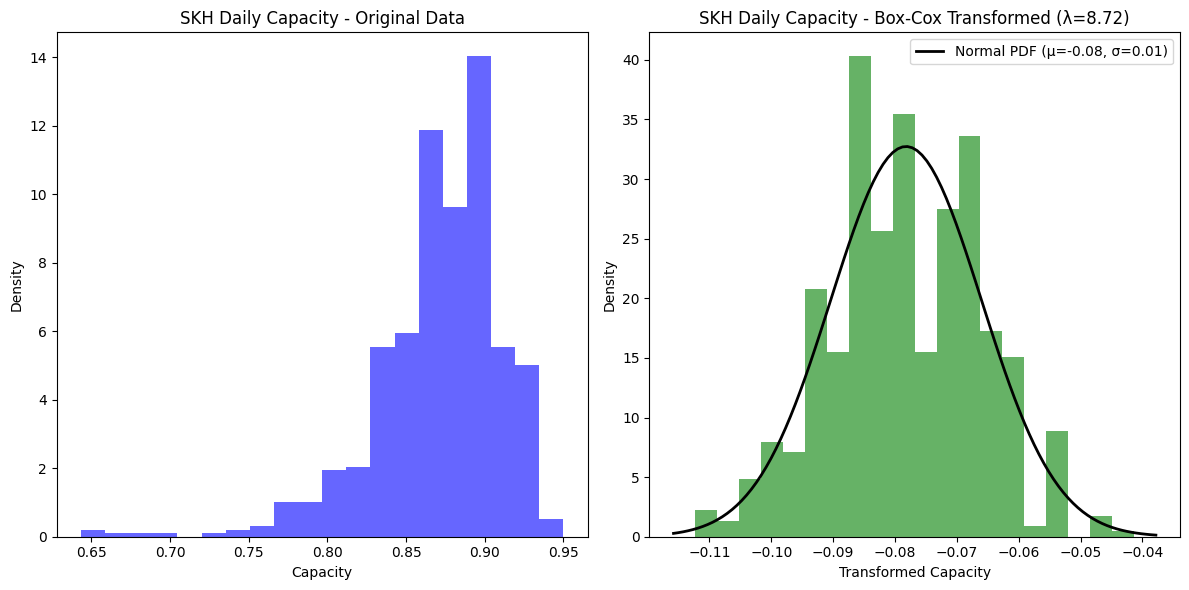

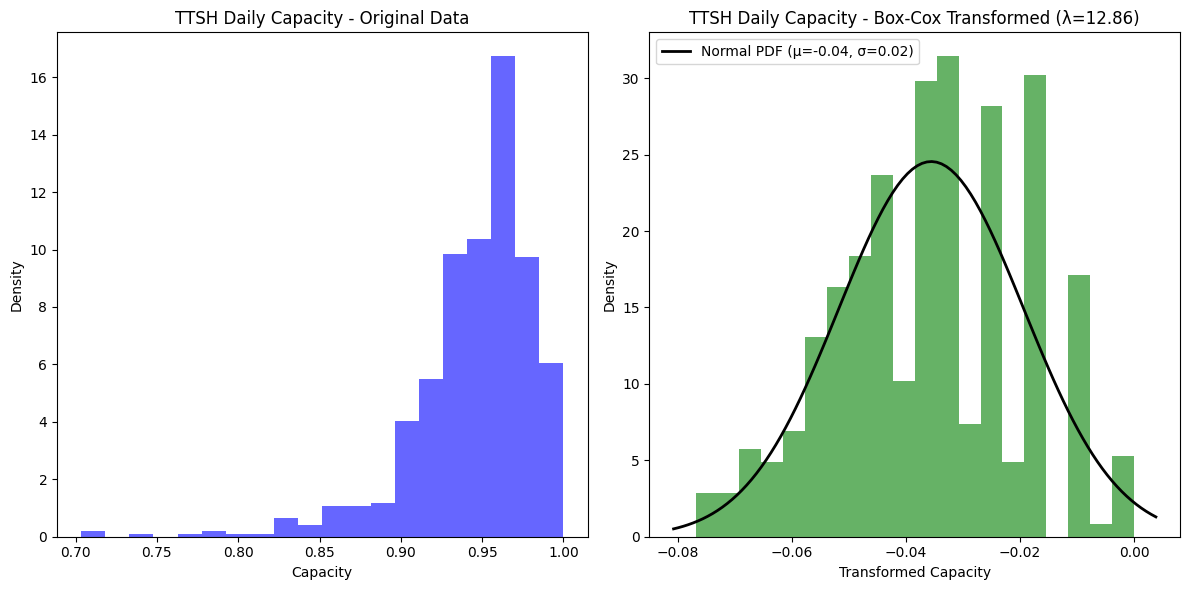

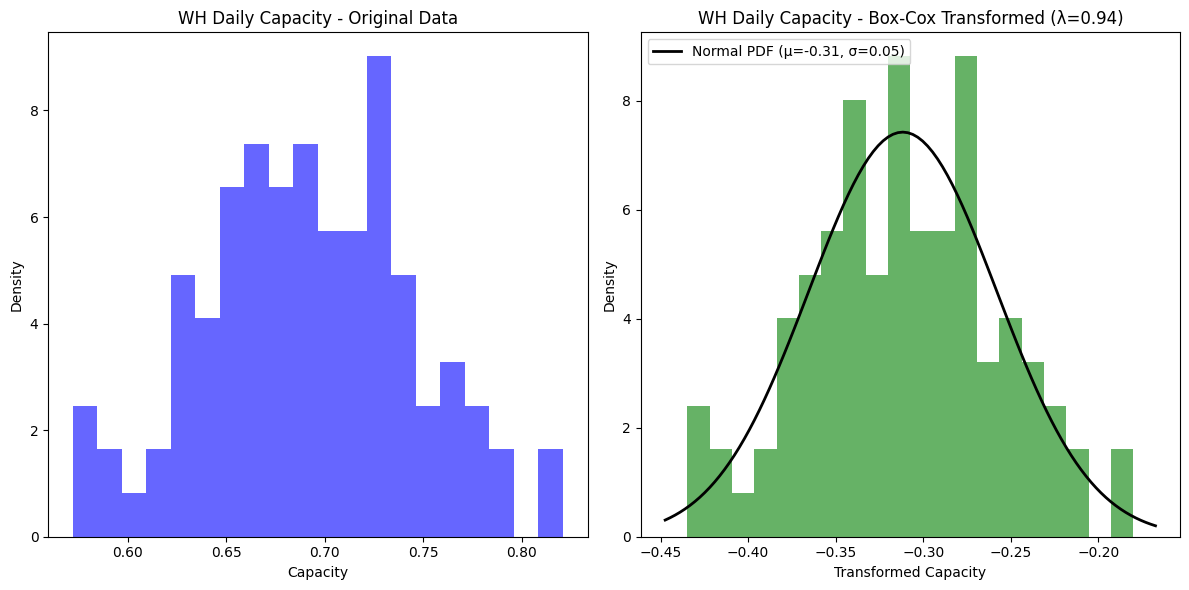

In [ ]:
# Plot histograms and Box-Cox transformations with PDFs for each hospital
for hospital in hospitals:
    # Extract hospital capacity data
    hospital_data = bor_2324_df[hospital]

    # Box-Cox transformation requires positive values
    hospital_data = hospital_data[hospital_data > 0] 
    hospital_data_boxcox, lambda_val = boxcox(hospital_data)

    # Plot histogram of original data
    plt.figure(figsize=(12, 6))
    
    # Original histogram
    plt.subplot(1, 2, 1)
    plt.hist(hospital_data, bins=20, density=True, alpha=0.6, color='blue')
    plt.title(f'{hospital} Daily Capacity - Original Data')
    plt.xlabel('Capacity')
    plt.ylabel('Density')

    # Box-Cox transformed data histogram with PDF
    plt.subplot(1, 2, 2)
    plt.hist(hospital_data_boxcox, bins=20, density=True, alpha=0.6, color='green')
    plt.title(f'{hospital} Daily Capacity - Box-Cox Transformed (λ={lambda_val:.2f})')
    plt.xlabel('Transformed Capacity')
    plt.ylabel('Density')
    
    # Fit a normal distribution to the transformed data and plot PDF
    mu, std = np.mean(hospital_data_boxcox), np.std(hospital_data_boxcox)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2, label=f'Normal PDF (μ={mu:.2f}, σ={std:.2f})')
    plt.legend()

    plt.tight_layout()
    plt.show()
